# Mandelbrot Fractal Generator

Welcome! In this notebook, we will:

- Learn what the **Mandelbrot set** is.  
- Generate Mandelbrot fractals using **NumPy**.  
- Visualize them using **Matplotlib**.  
- Explore fractals interactively with **ipywidgets sliders**.

# The Mandelbrot Set

The Mandelbrot Set is an infinitely complex and fascinating fractal, renowned for its intricate beauty and deep mathematical properties. It is generated by iterating a simple formula in the complex plane.

## Definition

The Mandelbrot Set is defined by the behavior of the following iterative formula:

$$
z_{n+1} = z_n^2 + c
$$

with the initial condition:

$$
z_0 = 0
$$

Where:
* `z` is a complex number that evolves with each iteration.
* `c` is a constant complex number representing a specific point in the complex plane being tested.
* `n` represents the iteration number, starting from 0.

A complex number `c` belongs to the Mandelbrot Set if the sequence $|z_n|$ remains **bounded** (i.e., its magnitude never grows indefinitely, typically defined as $|z_n| \le 2$ for all iterations). If the sequence **escapes** (i.e., its magnitude grows beyond a certain threshold, like 2, and continues to increase without limit), then `c` is *not* part of the Mandelbrot Set.

## Visualization

To visualize the Mandelbrot Set:

1.  **Iterate for Each Point:** For every point `c` on a grid representing a portion of the complex plane, the iterative formula `z_{n+1} = z_n^2 + c` (starting with `z_0 = 0`) is applied repeatedly.
2.  **Check for Escape:** In each iteration, the magnitude of `z_n` is checked. If `|z_n|` exceeds a predefined "escape radius" (commonly 2), the iteration for that `c` stops, as `c` is deemed to escape.
3.  **Coloring:**
    * Points `c` that remain bounded (do not escape after a large number of iterations) are typically colored **black**, forming the main body of the Mandelbrot Set.
    * Points `c` that escape are colored based on the number of iterations it took for them to escape. This creates the vibrant and intricate color bands surrounding the black set, with different colors representing different "escape times."

## Key Characteristics

* **Infinite Complexity:** The boundary of the Mandelbrot Set reveals endless intricate details and patterns upon zooming in, demonstrating its fractal nature.
* **Self-Similarity:** While not strictly identical, parts of the Mandelbrot Set's boundary exhibit approximate self-similarity, meaning smaller versions of the main shape can be found embedded within its structure.
* **Computational Generation:** It's a prime example of a set defined and visualized through iterative computation.
* **Connection to Julia Sets:** The Mandelbrot Set acts as a "map" to the connectedness of Julia Sets. A point `c` in the Mandelbrot Set corresponds to a connected Julia Set, while a point `c` outside the Mandelbrot Set corresponds to a disconnected Julia Set.
* **Aesthetic Appeal:** Beyond its mathematical depth, the Mandelbrot Set is widely celebrated for its striking visual beauty, making it a popular subject in mathematics, computer graphics, and art.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider
import warnings

# For clean output
warnings.filterwarnings('ignore')

# Enable inline plotting in Jupyter
%matplotlib inline


In [4]:
# Default parameters
resolution = 500          # Grid size along one axis
max_iterations = 50       # Depth of iterations for escape checking

# Region to explore in the complex plane
x_min, x_max = -2, 1
y_min, y_max = -1.5, 1.5


In [5]:
# Create 1D arrays of x and y
x = np.linspace(x_min, x_max, resolution)
y = np.linspace(y_min, y_max, resolution)

# Create 2D meshgrid for complex plane
X, Y = np.meshgrid(x, y)
C = X + 1j * Y  # Each point as a complex number

# Initialize Z to zero (all points start from z_0 = 0)
Z = np.zeros_like(C)

# To record the number of iterations before escape
divergence_iter = np.zeros(C.shape, dtype=int)


In [6]:
for i in range(max_iterations):
    Z = Z**2 + C  # Mandelbrot formula
    diverged = np.abs(Z) > 2  # Points that have escaped
    mask = diverged & (divergence_iter == 0)  # Capture first escape iteration
    divergence_iter[mask] = i
    Z[diverged] = 2  # Stabilize diverged points


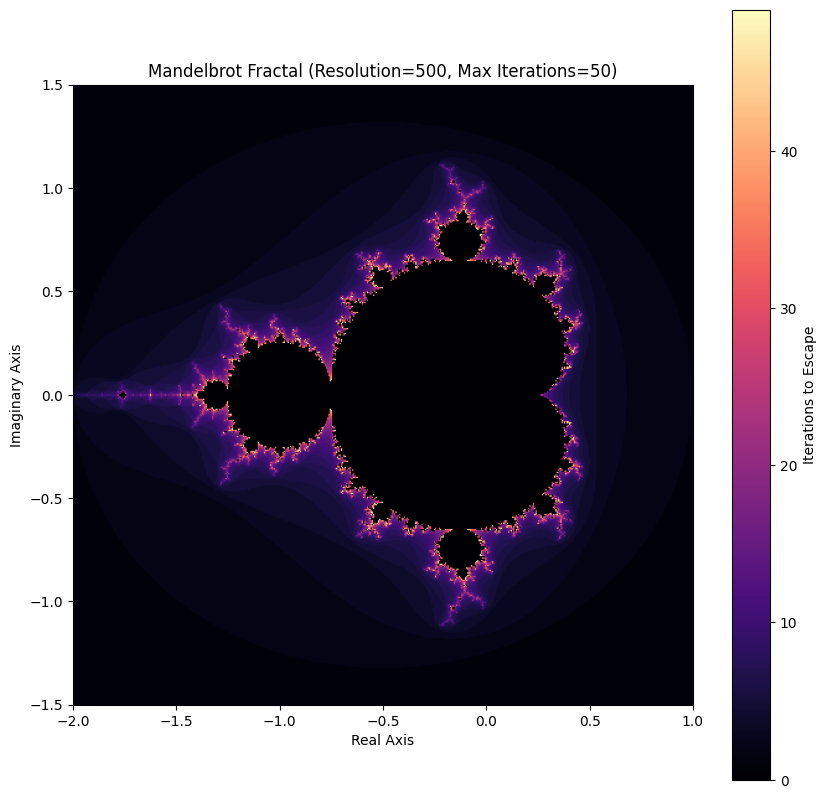

In [7]:
plt.figure(figsize=(10, 10))
plt.imshow(divergence_iter, cmap='magma', extent=(x_min, x_max, y_min, y_max))
plt.colorbar(label='Iterations to Escape')
plt.title(f'Mandelbrot Fractal (Resolution={resolution}, Max Iterations={max_iterations})')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.show()


In [8]:
def mandelbrot_plot(resolution=500, max_iterations=50, x_min=-2, x_max=1, y_min=-1.5, y_max=1.5):
    x = np.linspace(x_min, x_max, resolution)
    y = np.linspace(y_min, y_max, resolution)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y
    Z = np.zeros_like(C)
    divergence_iter = np.zeros(C.shape, dtype=int)

    for i in range(max_iterations):
        Z = Z**2 + C
        diverged = np.abs(Z) > 2
        mask = diverged & (divergence_iter == 0)
        divergence_iter[mask] = i
        Z[diverged] = 2

    plt.figure(figsize=(8, 8))
    plt.imshow(divergence_iter, cmap='magma', extent=(x_min, x_max, y_min, y_max))
    plt.title(f'Mandelbrot Fractal\nRes={resolution}, Max Iter={max_iterations}')
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.colorbar(label='Iterations to Escape')
    plt.show()

# Interactive sliders
interact(
    mandelbrot_plot,
    resolution=IntSlider(min=200, max=1500, step=100, value=500, description='Resolution'),
    max_iterations=IntSlider(min=20, max=500, step=10, value=50, description='Max Iter'),
    x_min=FloatSlider(min=-2.5, max=0, step=0.1, value=-2, description='X min'),
    x_max=FloatSlider(min=0, max=2.5, step=0.1, value=1, description='X max'),
    y_min=FloatSlider(min=-2, max=0, step=0.1, value=-1.5, description='Y min'),
    y_max=FloatSlider(min=0, max=2, step=0.1, value=1.5, description='Y max'),
);


interactive(children=(IntSlider(value=500, description='Resolution', max=1500, min=200, step=100), IntSlider(v…